<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Visualize Data
</div>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Read data

In [6]:
products_df = pd.read_csv("../data/processed/preprocess_QCL.csv")
item = pd.read_csv("../data/external/item_code.csv")
element = pd.read_csv("../data/external/element_code.csv")

In [7]:
products_df = products_df.merge(item, how= 'left', on= 'Item Code')
products_df = products_df.merge(element, how= 'left', on= 'Element Code')
products_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Element
0,QCL,237,5312,711,1961,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested (ha)
1,QCL,237,5419,711,1961,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",Yield (100 g/ha)
2,QCL,237,5510,711,1961,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",Production (t)
3,QCL,237,5312,711,1962,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",Area harvested (ha)
4,QCL,237,5419,711,1962,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN,Vegetables Primary,Yield (100 g/ha)
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Vegetables Primary,Production (t)
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN,Vegetables Primary,Area harvested (ha)
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN,Vegetables Primary,Yield (100 g/ha)


### What the cereal production and harvested area in Vietnam over the period from 1999 to 2021?
-   Purpose: Demonstrate the relationship between production and harvested area to illustrate the trends within the agriculture sector.
-   What is cereal: https://unstats.un.org/unsd/classifications/Econ/Detail/EN/1074/011
    -   Include: Wheat, Maize (corn), Rice, Sorghum, Barley, Rye, Oats, Millet, Triticale, Fonio, Quinoa, Canary seed.

In [8]:
cereal_df = products_df[products_df['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")]
cereal_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Element
4565,QCL,237,5312,56,1961,ha,260200.0,A,NaN,Maize (corn),Area harvested (ha)
4566,QCL,237,5419,56,1961,100 g/ha,11230.0,E,NaN,Maize (corn),Yield (100 g/ha)
4567,QCL,237,5510,56,1961,t,292200.0,A,NaN,Maize (corn),Production (t)
4568,QCL,237,5312,56,1962,ha,262020.0,X,Unofficial figure,Maize (corn),Area harvested (ha)
4569,QCL,237,5419,56,1962,100 g/ha,11987.0,X,Unofficial figure,Maize (corn),Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...
10713,QCL,237,5510,83,2019,t,0.0,M,NaN,Sorghum,Production (t)
10714,QCL,237,5312,83,2020,ha,0.0,M,NaN,Sorghum,Area harvested (ha)
10715,QCL,237,5510,83,2020,t,0.0,M,NaN,Sorghum,Production (t)
10716,QCL,237,5312,83,2021,ha,0.0,M,NaN,Sorghum,Area harvested (ha)


-   Look like data with flag `M` is missing data or not exist, drop those data.

In [9]:
cereal_df = cereal_df[cereal_df.Flag != "M"]

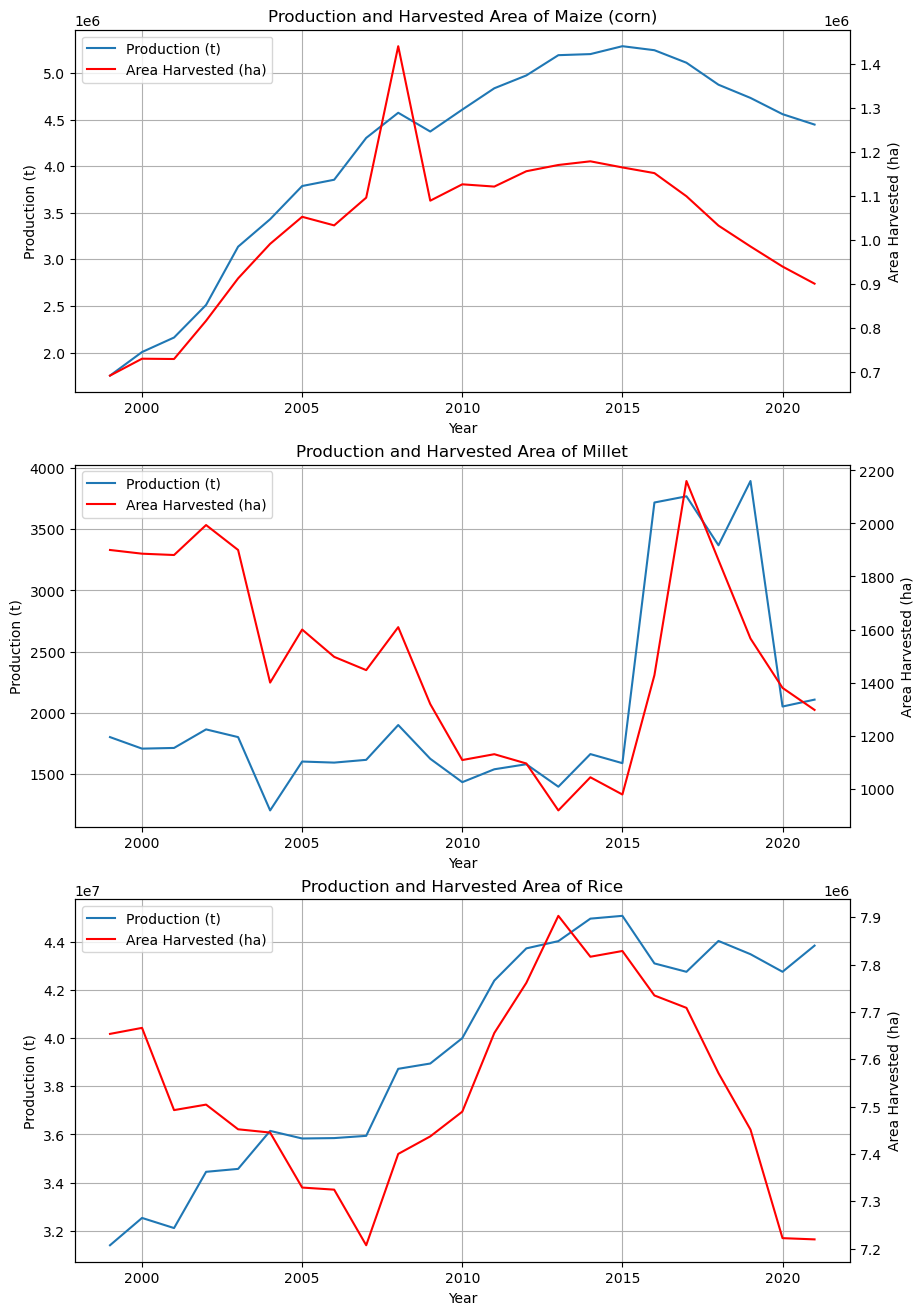

In [10]:
data_production = cereal_df[cereal_df['Element Code'] == 5510]
data_area = cereal_df[cereal_df['Element Code'] == 5312]

data_production = data_production[data_production.Year.between(1999, 2022)]
data_production

data_area = data_area[data_area.Year.between(1999, 2022)]
data_area

n = 0

fig = plt.figure(figsize=(10, 16))

for item in data_production['Item'].unique():
    prod = data_production[data_production['Item'] == item]
    area = data_area[data_area['Item'] == item]
    ax1 = plt.subplot(3, 1, n + 1)

    line1 = ax1.plot(prod.Year,prod.Value, label= "Production (t)")
    ax2 = ax1.twinx()
    line2 = ax2.plot(area.Year,area.Value, label= "Area Harvested (ha)", c= 'r')


    ax1.grid()
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Production (t)")
    ax2.set_ylabel("Area Harvested (ha)")
    ax1.set_title(f"Production and Harvested Area of {item}")
    
    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)
    n += 1

plt.show()

### Comment
-   The graph above illustrates the cereal production and harvested area in Vietnam over the period from 1999 to 2021.
-   Maize (corn):
    -   Production: 
        -   grow discontinous, grow about: $$\frac{4446383.17}{1753100.00} * 100\% =  253.63\% $$
        -   Area Harvested: grow discontinous, grow about: $$\frac{900673.0}{691800.0} * 100\% =  130.19\% $$   
-   Millet:
    -   Production: grow discontinous, grow about: $$\frac{2106.63}{1800.0} * 100\% =  117.035\% $$
    -   Area Harvested: fall discontinous, fall about: $$\frac{1900.0 - 1297.0}{1900.0} * 100\% =  31.74\% $$
-   Rice:
    -   Production: grow discontinous, grow about: $$\frac{43852728.69}{31393800.0} * 100\% =  139.69\% $$
    -   Area Harvested: fall discontinous, fall about: $$\frac{7653600.0 - 7219797.0}{7653600.0} * 100\% =  5.67\% $$

-   In conclusion: from 1999 to 2021: 
    -   Production of `Maize (corn)`, `Millet`, and `Rice` increase dramatically (over 100%)
    -   Area Harvested of `Maize (corn)` increase dramatically (over 100%)
    -   Expect for Area Harvested of `Millet`, which fall significantly (about 31.74%) and and `Rice`, which fall slighly (about 5.67%)